In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Activation, Masking, Bidirectional, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from keras.callbacks import TensorBoard
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pylab as plt

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

timestep = 30
seq = 300

trainData = trainD.reshape((trainD.shape[0], timestep, seq))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], timestep, seq))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], timestep, seq))
testLabel = np_utils.to_categorical(testL, 4)

print(trainLabel)
plt.figure(figsize=(30,4))
plt.plot(testData[0][0])
plt.show()

# scaler = MinMaxScaler(feature_range=(-1, 1))
# for i in range(len(trainData)):
#     trainData[i]= scaler.fit_transform(trainData[i])
# for i in range(len(validationData)):
#     validationData[i] = scaler.fit_transform(validationData[i])
# for i in range(len(testData)):
#     testData[i]  = scaler.fit_transform(testData[i])

# plt.plot(scaler.data_max_)
# plt.show()

print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


<Figure size 3000x400 with 1 Axes>

Train Data: (5078, 30, 300)
Train Label:  (5078, 4)
Vali Data:  (2032, 30, 300)
Vali Label:  (2032, 4)
Test Data:  (3041, 30, 300)
Test Label:  (3041, 4)


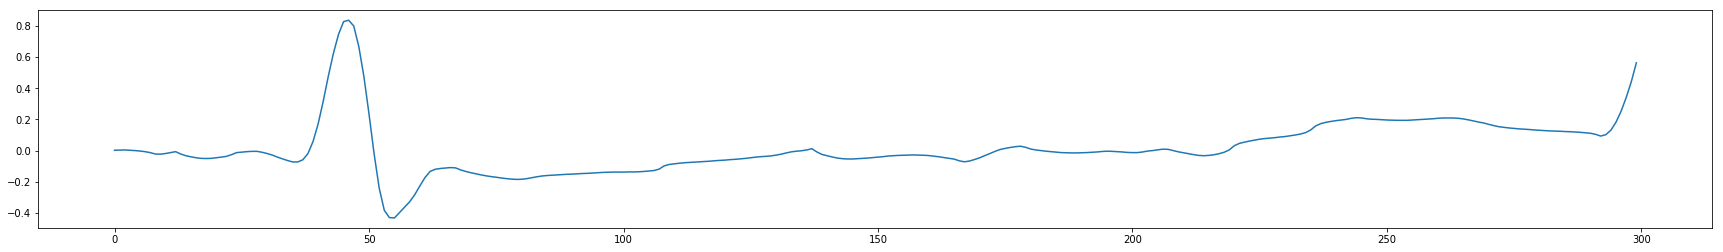

In [2]:
plt.figure(figsize=(30,4))
plt.plot(testData[0][0])
plt.show()

In [3]:
model = Sequential()
#, activity_regularizer=regularizers.l2(0.0001)
# , dropout_W=0.2, dropout_U=0.2
model.add(LSTM(8, return_sequences=True, dropout_W=0.2, dropout_U=0.2, input_shape = (timestep, seq)))
model.add(LSTM(8, return_sequences=True, dropout_W=0.2, dropout_U=0.2))
model.add(LSTM(8, dropout_W=0.2, dropout_U=0.2))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(4, activation="softmax"))
print(model.summary())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, input_shape=(30, 300), recurrent_dropout=0.2, dropout=0.2, return_sequences=True)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, recurrent_dropout=0.2, return_sequences=True, dropout=0.2)`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, recurrent_dropout=0.2, dropout=0.2)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 8)             9888      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 8)             544       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
__________

In [4]:
adam = Adam(lr = 0.001)
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ['accuracy'])
# graph = TensorBoard()
train_history = model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=500,
                          validation_data=(validationData, validationLabel),
                          #callbacks=[graph],
                          batch_size=80,
                          #shuffle=False,
                          )


Train on 5078 samples, validate on 2032 samples
Epoch 1/500
5078/5078 [==============================] - 17s 3ms/step - loss: 1.1202 - acc: 0.5778 - val_loss: 1.0567 - val_acc: 0.5866
Epoch 2/500
5078/5078 [==============================] - 13s 2ms/step - loss: 1.0324 - acc: 0.5880 - val_loss: 1.0275 - val_acc: 0.5886
Epoch 3/500
5078/5078 [==============================] - 13s 2ms/step - loss: 1.0094 - acc: 0.5912 - val_loss: 1.0124 - val_acc: 0.5866
Epoch 4/500
5078/5078 [==============================] - 13s 3ms/step - loss: 0.9978 - acc: 0.5892 - val_loss: 1.0045 - val_acc: 0.5871
Epoch 5/500
5078/5078 [==============================] - 13s 2ms/step - loss: 0.9907 - acc: 0.5914 - val_loss: 1.0003 - val_acc: 0.5871
Epoch 6/500
5078/5078 [==============================] - 13s 2ms/step - loss: 0.9859 - acc: 0.5910 - val_loss: 0.9977 - val_acc: 0.5866
Epoch 7/500
5078/5078 [==============================] - 13s 2ms/step - loss: 0.9829 - acc: 0.5933 - val_loss: 0.9945 - val_acc: 0.5871


5078/5078 [==============================] - 12s 2ms/step - loss: 0.7673 - acc: 0.6896 - val_loss: 0.8928 - val_acc: 0.6329
Epoch 61/500
5078/5078 [==============================] - 13s 2ms/step - loss: 0.7667 - acc: 0.6889 - val_loss: 0.8990 - val_acc: 0.6378
Epoch 62/500
5078/5078 [==============================] - 13s 2ms/step - loss: 0.7676 - acc: 0.6924 - val_loss: 0.9027 - val_acc: 0.6334
Epoch 63/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.7656 - acc: 0.6906 - val_loss: 0.8984 - val_acc: 0.6344
Epoch 64/500
5078/5078 [==============================] - 13s 2ms/step - loss: 0.7634 - acc: 0.6918 - val_loss: 0.9010 - val_acc: 0.6304
Epoch 65/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.7692 - acc: 0.6936 - val_loss: 0.8990 - val_acc: 0.6280
Epoch 66/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.7587 - acc: 0.6955 - val_loss: 0.8945 - val_acc: 0.6314
Epoch 67/500
5078/5078 [==============================

Epoch 120/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.7100 - acc: 0.7135 - val_loss: 0.9145 - val_acc: 0.6329
Epoch 121/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.7058 - acc: 0.7113 - val_loss: 0.9230 - val_acc: 0.6334
Epoch 122/500
5078/5078 [==============================] - 13s 2ms/step - loss: 0.7164 - acc: 0.7089 - val_loss: 0.9197 - val_acc: 0.6309
Epoch 123/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.7071 - acc: 0.7147 - val_loss: 0.9177 - val_acc: 0.6304
Epoch 124/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.7176 - acc: 0.7111 - val_loss: 0.9231 - val_acc: 0.6324
Epoch 125/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.6999 - acc: 0.7160 - val_loss: 0.9253 - val_acc: 0.6348
Epoch 126/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.7048 - acc: 0.7219 - val_loss: 0.9236 - val_acc: 0.6368
Epoch 127/500
5078/5078 [=========

5078/5078 [==============================] - 12s 2ms/step - loss: 0.6748 - acc: 0.7322 - val_loss: 0.9313 - val_acc: 0.6447
Epoch 180/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.6610 - acc: 0.7359 - val_loss: 0.9429 - val_acc: 0.6324
Epoch 181/500
5078/5078 [==============================] - 13s 2ms/step - loss: 0.6728 - acc: 0.7227 - val_loss: 0.9377 - val_acc: 0.6368
Epoch 182/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.6627 - acc: 0.7343 - val_loss: 0.9469 - val_acc: 0.6348
Epoch 183/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.6677 - acc: 0.7243 - val_loss: 0.9424 - val_acc: 0.6378
Epoch 184/500
5078/5078 [==============================] - 12s 2ms/step - loss: 0.6649 - acc: 0.7330 - val_loss: 0.9512 - val_acc: 0.6319
Epoch 185/500
5078/5078 [==============================] - 13s 2ms/step - loss: 0.6555 - acc: 0.7383 - val_loss: 0.9701 - val_acc: 0.6255
Epoch 186/500
5078/5078 [=======================

KeyboardInterrupt: 

In [ ]:
import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

In [ ]:
show_plot('acc', train_history)

In [ ]:
show_plot('loss', train_history)